In [128]:
import webbrowser

webbrowser.open('https://dr7.lamost.org/catalogue')    # Download LAMOST LRS General Catalog and LAMOST MRS General Catalog CSV files

True

In [14]:
import webbrowser

webbrowser.open('https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A%2BA/621/A38')

True

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

from astroquery.gaia import Gaia
from astroquery.simbad import Simbad

import astropy.coordinates as coord
import astropy.units as u

import pyvo as vo

import webbrowser

import starcolorindexSpT 

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
import astroquery

print("pandas" + str(pd.__version__))
print("numpy"  + str(np.__version__))
print("scipy"  + str(sp.__version__))

print("matplotlib" + str(matplotlib.__version__))

print("astroquery" + str(astroquery.__version__))


print("\n")
!python --version

print("\n")
!jupyter --version

pandas1.1.5
numpy1.24.2
scipy1.9.3
matplotlib3.2.2
astroquery0.4.7.dev8479


Python 3.8.5


Selected Jupyter core packages...
IPython          : 8.12.0
ipykernel        : 6.19.2
ipywidgets       : 8.0.4
jupyter_client   : 8.1.0
jupyter_core     : 5.3.0
jupyter_server   : 2.5.0
jupyterlab       : not installed
nbclient         : 0.5.13
nbconvert        : 7.3.1
nbformat         : 5.7.0
notebook         : 6.5.3
qtconsole        : 5.4.2
traitlets        : 5.7.1


In [3]:
from astroquery.vizier import Vizier

from astropy.table import Table

Vizier.ROW_LIMIT = -1

result = Vizier.query_constraints(catalog='J/A+A/621/A38')    #  Gaia catalogue of hot subluminous stars (39800 rows)

print(result)  # '0:J/A+A/621/A38/catalog' with 89 column(s) and 39800 row(s) 

TableList with 1 tables:
	'0:J/A+A/621/A38/catalog' with 89 column(s) and 39800 row(s) 


In [6]:
result[0].columns

<TableColumns names=('Name','Gaia','RAJ2000','DEJ2000','Select','SpTypeSim','SpTypeSD','Plx','GMAG','Gmag','BPmag','RPmag','BP-RP','pmRA','pmDE','E_B-V_','AV','FUVmag','NUVmag','VAPASS','BAPASS','gAPASS','rAPASS','iAPASS','uSDSS','gSDSS','rSDSS','iSDSS','zSDSS','uSKYM','vSKYM','gSKYM','rSKYM','iSKYM','zSKYM','uATLAS','gATLAS','rATLAS','iATLAS','zATLAS','uVPHAS','gVPHAS','r2VPHAS','HaVPHAS','rVPHAS','iVPHAS','uKiDS','gKiDS','rKiDS','iKiDS','gPS1','rPS1','iPS1','zPS1','yPS1','rIPHAS','iIPHAS','HaIPHAS','J2MASS','H2MASS','K2MASS','YUKIDSS','JUKIDSS','HUKIDSS','KUKIDSS','YVHS','JVHS','HVHS','KsVHS','ZVVV','YVVV','JVVV','HVVV','KsVVV','ZVIKING','YVIKING','JVIKING','HVIKING','KsVIKING','W1mag','W2mag','W3mag','W4mag','Dens','epsi','sepsi','amax','E_BR_RP_','SED')>

In [7]:
list_columns = ['Name','Gaia','RAJ2000','DEJ2000','Select','SpTypeSim','SpTypeSD','Plx','GMAG','Gmag','BPmag','RPmag','BP-RP','pmRA','pmDE','E_B-V_','AV','FUVmag','NUVmag','VAPASS','BAPASS','gAPASS','rAPASS','iAPASS','uSDSS','gSDSS','rSDSS','iSDSS','zSDSS','uSKYM','vSKYM','gSKYM','rSKYM','iSKYM','zSKYM','uATLAS','gATLAS','rATLAS','iATLAS','zATLAS','uVPHAS','gVPHAS','r2VPHAS','HaVPHAS','rVPHAS','iVPHAS','uKiDS','gKiDS','rKiDS','iKiDS','gPS1','rPS1','iPS1','zPS1','yPS1','rIPHAS','iIPHAS','HaIPHAS','J2MASS','H2MASS','K2MASS','YUKIDSS','JUKIDSS','HUKIDSS','KUKIDSS','YVHS','JVHS','HVHS','KsVHS','ZVVV','YVVV','JVVV','HVVV','KsVVV','ZVIKING','YVIKING','JVIKING','HVIKING','KsVIKING','W1mag','W2mag','W3mag','W4mag','Dens','epsi','sepsi','amax','E_BR_RP_','SED']

In [8]:
import pandas as pd

list = []

list = result[result.keys()[0]]

df = pd.DataFrame.from_records(list, columns=list_columns)


In [9]:
df.head()

,Name,Gaia,RAJ2000,DEJ2000,Select,SpTypeSim,SpTypeSD,Plx,GMAG,Gmag,...,W1mag,W2mag,W3mag,W4mag,Dens,epsi,sepsi,amax,E_BR_RP_,SED
0,SB937,Gaia DR2 2313054538477276160,0.016782,-33.588654,COLOUR_REDPM,A0,,0.2431,1.1628,14.233900,...,14.289,14.28,12.644,8.75,2484.7498,0.277000,14.520544,0.092586,1.188000,SED
1,PHL615,Gaia DR2 2414485448212792064,0.021629,-17.147625,COLOUR_REDPM,sdO5He4,sdO,0.2363,--,16.798401,...,--,--,--,--,3024.4438,0.316000,3.537208,0.161034,1.243000,SED
2,PG2357+174,Gaia DR2 2773760665114010880,0.065659,17.648045,COLOUR_REDPM,sdB,sdB,0.4881,4.9884,16.545900,...,16.969,16.614,12.541,8.889,4105.8315,0.353000,5.738525,0.217278,1.244000,SED
3,UVEXJ000016.27+603246.3,Gaia DR2 429345443672003072,0.067773,60.546199,COLOUR_PLX,sdB,,0.7556,5.9593,16.567801,...,--,--,--,--,76111.2340,0.189899,1.505587,0.092514,1.223866,SED
4,HS2357+2201,Gaia DR2 2847977322031768832,0.076685,22.300821,COLOUR_PLX,sdB,sdB,1.0670,4.3781,14.236300,...,14.933,15.118,12.288,9.105,5186.1606,0.389168,27.937053,0.125877,1.210584,SED


In [41]:
df.to_csv('Gaia_catalogue_of_hot_subluminous_stars_39800.csv')

In [1]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [4]:
make_canvas_flag = "Y"

hydrogen_lines_flag = "N"

In [5]:
def make_labels(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

In [6]:
def make_RVS_canvas(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Ca II 8498', xy=[8498, yRangeMin ],  rotation=-90, color='red')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin ], rotation=-90, color='red')
    plt.annotate('Pa14 8600', xy=[8600, yRangeMin - 0.3 ], rotation=-90, color='red')
    plt.annotate('Ca II 8662.1', xy=[8662, yRangeMin ],  rotation=-90, color='red')

In [7]:
# Plotter ==============================================
def make_canvas(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    plt.xticks([3839, 3889, 3970, 4101, 4340, 4472, 4861, 5175, 5270, 5411, 5755, 5895, 6302,
               6365, 6562, 6562, 6890, 7135, 7500, 7775, 8000, 8498, 8542, 8662, 9000, 9200])
    
    xLabels = (3839, 3889, 3970, 4101, 4340, 4472, 4861, 5175, 5270, 5411, 5755, 5895, 6302,
               6365, 6562, 6562, 6890, 7135, 7500, 7775, 8000, 8498, 8542, 8662, 9000, 9200)

    plt.xticks(xLabels, rotation=90)

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 0.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('CN 3839', xy=[3839,   yRangeMin + 0.6],  rotation=-90)
    plt.annotate('H-zeta 3889', xy=[3889, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-epsilon 3970', xy=[3970, yRangeMin +  0.6],  rotation=-90, color='red')
    plt.annotate('H-delta 4101', xy=[4101, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-gamma 4340', xy=[4340, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('He I 4471.7', xy=[4472, yRangeMin + .20],  rotation=-90, color='orange')
    plt.annotate('H-beta 4861', xy=[4861, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('Mg I 5175', xy=[5175, yRangeMin + .20],  rotation=-90)
    plt.annotate('Fe I 5270', xy=[5270, yRangeMin +  .20],  rotation=-90)
    plt.annotate('He II 5411', xy=[5411, yRangeMin +  .20],  rotation=-90, color='orange')
    plt.annotate('N II 5755', xy=[5755, yRangeMin +  .20],  rotation=-90)
    plt.annotate('D1 Na I 5895', xy=[5895, yRangeMin +  .20],  rotation=-90, color='blue')
    plt.annotate('OI 6302', xy=[6302, yRangeMin +  .20],  rotation=-90, color='green')
    plt.annotate('OI 6365.5', xy=[6365, yRangeMin +  .20],  rotation=-90, color='green')
    plt.annotate('H-alpha 6562', xy=[6562, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('CN 6890', xy=[6890, yRangeMin +  .20],  rotation=-90)
    plt.annotate('Ar III 7135', xy=[7135, yRangeMin +  .20],  rotation=-90)
    plt.annotate('O I 7775', xy=[7775, yRangeMin +  .20], rotation=-90, color='green')
    plt.annotate('Ca II 8498', xy=[8498, yRangeMin +  .35],  rotation=-90, color='blue')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin +  .30], rotation=-90, color='blue')
    plt.annotate('Ca II 8662.1', xy=[8662, yRangeMin +  .30],  rotation=-90, color='blue')


def Hydrogen_lines(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    plt.xticks([3835, 3889, 3970, 4101, 4340, 4861, 6000, 6562, 7000, 8000, 9000, 10000])
    
    xLabels = (3835, 3889, 3970, 4101, 4340, 4861, 6000, 6562, 7000, 8000, 9000, 10000)

    plt.xticks(xLabels, rotation=90)

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 0.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('H12 3750', xy=[3750, yRangeMin +  .50],  rotation=-90, color='red')
    plt.annotate('H11 3771', xy=[3771, yRangeMin -  .35],  rotation=-90, color='red')
    plt.annotate('H10 3798', xy=[3798, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H9 3835', xy=[3835, yRangeMin -  .10],  rotation=-90, color='red')

    plt.annotate('H8-zeta 3889', xy=[3889, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-epsilon 3970', xy=[3970, yRangeMin +  0.6],  rotation=-90, color='red')
    plt.annotate('H-delta 4101', xy=[4101, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-gamma 4340', xy=[4340, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('H-beta 4861', xy=[4861, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('H-alpha 6562', xy=[6562, yRangeMin +  .20],  rotation=-90, color='red')

In [8]:
def make_RVS_canvas1(xlabel = '', ylabel = '', fontsize = 12):     ### 8460 - 8580
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Fe I 8470', xy=[8470, yRangeMin ],  rotation=-90, color='green')
    plt.annotate('Mg I 8476', xy=[8476, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8483', xy=[8483, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ca II 8498', xy=[8498, yRangeMin ],  rotation=-90, color='red')
    plt.annotate('Ca II 8502', xy=[8502, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ce II 8514', xy=[8514, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe I 8516', xy=[8516, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ti I 8520.6', xy=[8520.6, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Zr II 8527', xy=[8527, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe I 8529', xy=[8529, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Si I 8538', xy=[8538, yRangeMin - 0.3],  rotation=-90, color='red')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ca II 8546', xy=[8546, yRangeMin - 0.3],  rotation=-90, color='red')
    plt.annotate('Cr I 8551', xy=[8551, yRangeMin  - 0.3],  rotation=-90, color='green')
    plt.annotate('Si I 8559', xy=[8559, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Ti I 8572', xy=[8572, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8574', xy=[8574, yRangeMin - 0.3],  rotation=-90, color='green')

In [9]:
def make_RVS_canvas2(xlabel = '', ylabel = '', fontsize = 12):    ### 8580 - 8700
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Fe I 8584', xy=[8584, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe II 8588', xy=[8588, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Nd II 8594', xy=[8594, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8624', xy=[8624, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('N I 8631',  xy=[8631, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Ca I 8636',  xy=[8636, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Ni I 8639',  xy=[8639, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Cr I 8645', xy=[8645, yRangeMin  - 0.3],  rotation=-90, color='green')
    plt.annotate('Ca II 8662', xy=[8662, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ca II 8666', xy=[8666, yRangeMin],  rotation=-90, color='red')
    plt.annotate('S I 8672',  xy=[8672, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Fe I 8677', xy=[8677, yRangeMin],  rotation=-90, color='green')
    plt.annotate('N I 8685',  xy=[8685, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Si I 8688', xy=[8688, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Fe I 8691', xy=[8691, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ti I 8694', xy=[8694, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('S I 8697',  xy=[8697, yRangeMin  - 0.3 ],  rotation=-90, color='red')

In [10]:
# https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A%2BA/621/A38

df_hot_subluminous = pd.read_csv('Gaia_catalogue_of_hot_subluminous_stars_39800.csv')

df_hot_subluminous.shape[0]

39800

In [11]:
df_lamost_LRS_stars = pd.read_csv('dr7_v2.0_LRS_catalogue.csv', delimiter='|')     # 10431197 stars

df_lamost_MRS_stars = pd.read_csv('dr7_v2.0_MRS_catalogue.csv', delimiter='|')     # 14096967 stars - No subclass field

In [12]:
df_lamost_LRS_stars.head()

,obsid,designation,obsdate,lmjd,mjd,planid,spid,fiberid,ra_obs,dec_obs,...,fibertype,tfrom,tcomment,offsets,offsets_v,ra,dec,fibermask,gaia_source_id,gaia_g_mean_mag
0,101001,J220848.54-020324.3,2011-10-24,55859,55858,F5902,1,1,332.202274,-2.056767,...,Obj,-,.,0,0.0,332.202274,-2.056767,2,2.676862e+18,16.468395
1,101002,J220953.17-020506.0,2011-10-24,55859,55858,F5902,1,2,332.471576,-2.085015,...,Obj,-,.,0,0.0,332.471576,-2.085015,0,2.676109e+18,16.623343
2,101005,J221008.50-020659.1,2011-10-24,55859,55858,F5902,1,5,332.535456,-2.116436,...,Obj,-,.,0,0.0,332.535456,-2.116436,0,2.676109e+18,17.034334
3,101007,J221003.01-015029.0,2011-10-24,55859,55858,F5902,1,7,332.512558,-1.841408,...,Obj,-,.,0,0.0,332.512558,-1.841408,8,2.676873e+18,18.120117
4,101008,J220928.49-015720.7,2011-10-24,55859,55858,F5902,1,8,332.368745,-1.955771,...,Obj,-,.,0,0.0,332.368745,-1.955771,0,2.676865e+18,16.039270


In [13]:
print('{:d} rows'.format(len(df_lamost_LRS_stars)))
print('{:.1f} MB'.format(df_lamost_LRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

10431197 rows
9781.1 MB


In [14]:
df_lamost_LRS_stars = df_lamost_LRS_stars[df_lamost_LRS_stars['gaia_source_id'].astype(str) != '-9999']

In [15]:
df_lamost_LRS_stars = df_lamost_LRS_stars[['obsid','designation','objtype','class', 'subclass','gaia_source_id']]

In [16]:
df_lamost_LRS_stars.head()

,obsid,designation,objtype,class,subclass,gaia_source_id
0,101001,J220848.54-020324.3,Star,STAR,G7,2.676862e+18
1,101002,J220953.17-020506.0,Star,STAR,K7,2.676109e+18
2,101005,J221008.50-020659.1,Star,STAR,G0,2.676109e+18
3,101007,J221003.01-015029.0,Star,STAR,dM4,2.676873e+18
4,101008,J220928.49-015720.7,Star,STAR,F9,2.676865e+18


In [17]:
print('{:d} rows'.format(len(df_lamost_LRS_stars)))
print('{:.1f} MB'.format(df_lamost_LRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

10431197 rows
2941.7 MB


In [18]:
df_lamost_MRS_stars.head()

,mobsid,obsid,designation,obsdate,lmjd,mjd,planid,spid,fiberid,lmjm,...,rv_lasp1_err,coadd,fibermask,bad_b,bad_r,gaia_source_id,gaia_g_mean_mag,moon_angle,lunardate,moon_flg
0,58891524483556038B,588915244,J010217.11+061808.0,2017-09-28,58025,58024,HIP507401,15,244,83556038.0,...,-9999.00,0,0.0,0,0,2577199768825094016,14.951456,95.2,9,0
1,58890221283556038B,588902212,J005946.46+033816.3,2017-09-28,58025,58024,HIP507401,2,212,83556038.0,...,1.15,0,0.0,0,0,2551489746698714368,11.647265,95.2,9,0
2,58891519683556038B,588915196,J010354.98+062221.3,2017-09-28,58025,58024,HIP507401,15,196,83556038.0,...,-9999.00,0,0.0,0,0,2576471926487172224,15.034384,95.2,9,0
3,58890818283556038B,588908182,J010636.29+043330.6,2017-09-28,58025,58024,HIP507401,8,182,83556038.0,...,-9999.00,0,0.0,0,0,2540020607765617664,14.136907,95.2,9,0
4,58890914083556038B,588909140,J010955.98+055445.7,2017-09-28,58025,58024,HIP507401,9,140,83556038.0,...,-9999.00,0,0.0,0,0,2576281092500224896,12.546629,95.2,9,0


In [19]:
print('{:d} rows'.format(len(df_lamost_MRS_stars)))
print('{:.1f} MB'.format(df_lamost_MRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

14096967 rows
15472.0 MB


In [20]:
df_lamost_MRS_stars = df_lamost_MRS_stars[df_lamost_MRS_stars['gaia_source_id'].astype(str) != '-9999']

In [21]:
df_lamost_MRS_stars = df_lamost_MRS_stars[['mobsid','obsid','designation','objtype','gaia_source_id']]

In [22]:
df_lamost_MRS_stars.head()

,mobsid,obsid,designation,objtype,gaia_source_id
0,58891524483556038B,588915244,J010217.11+061808.0,Star,2577199768825094016
1,58890221283556038B,588902212,J005946.46+033816.3,Star,2551489746698714368
2,58891519683556038B,588915196,J010354.98+062221.3,Star,2576471926487172224
3,58890818283556038B,588908182,J010636.29+043330.6,Star,2540020607765617664
4,58890914083556038B,588909140,J010955.98+055445.7,Star,2576281092500224896


In [23]:
print('{:d} rows'.format(len(df_lamost_MRS_stars)))
print('{:.1f} MB'.format(df_lamost_MRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

13709506 rows
3213.5 MB


In [24]:
df_lamost_LRS_stars['gaia_source_id'] = df_lamost_LRS_stars['gaia_source_id'].astype('Int64')

df_lamost_MRS_stars['gaia_source_id'] = df_lamost_MRS_stars['gaia_source_id'].astype('Int64')

In [25]:
unique_class = np.unique(df_lamost_LRS_stars['class'].astype(str))

In [26]:
unique_class

array(['GALAXY', 'QSO', 'STAR', 'Unknown'], dtype=object)

In [27]:
for vartype in unique_class:
    v = df_lamost_LRS_stars[df_lamost_LRS_stars['class'] == vartype]
    print(str(vartype) + "  count: "  + str(v.shape[0]))

GALAXY  count: 198272
QSO  count: 66612
STAR  count: 9846793
Unknown  count: 319520


In [28]:
print('{:d} rows'.format(len(df_lamost_LRS_stars)))
print('{:.1f} MB'.format(df_lamost_LRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

10431197 rows
2952.2 MB


In [29]:
df_lamost_LRS_stars = df_lamost_LRS_stars[df_lamost_LRS_stars['class'] == 'STAR']

In [30]:
print('{:d} rows'.format(len(df_lamost_LRS_stars)))
print('{:.1f} MB'.format(df_lamost_LRS_stars.memory_usage(index=True,deep=True).sum()/1e6))

9846793 rows
2785.0 MB


In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

df_hot_subluminous.head(5)

,Unnamed: 0,Name,Gaia,RAJ2000,DEJ2000,Select,SpTypeSim,SpTypeSD,Plx,GMAG,Gmag,BPmag,RPmag,BP-RP,pmRA,pmDE,E_B-V_,AV,FUVmag,NUVmag,VAPASS,BAPASS,gAPASS,rAPASS,iAPASS,uSDSS,gSDSS,rSDSS,iSDSS,zSDSS,uSKYM,vSKYM,gSKYM,rSKYM,iSKYM,zSKYM,uATLAS,gATLAS,rATLAS,iATLAS,zATLAS,uVPHAS,gVPHAS,r2VPHAS,HaVPHAS,rVPHAS,iVPHAS,uKiDS,gKiDS,rKiDS,iKiDS,gPS1,rPS1,iPS1,zPS1,yPS1,rIPHAS,iIPHAS,HaIPHAS,J2MASS,H2MASS,K2MASS,YUKIDSS,JUKIDSS,HUKIDSS,KUKIDSS,YVHS,JVHS,HVHS,KsVHS,ZVVV,YVVV,JVVV,HVVV,KsVVV,ZVIKING,YVIKING,JVIKING,HVIKING,KsVIKING,W1mag,W2mag,W3mag,W4mag,Dens,epsi,sepsi,amax,E_BR_RP_,SED
0,0,SB937,Gaia DR2 2313054538477276160,0.016782,-33.588654,COLOUR_REDPM,A0,NaN,0.2431,1.1628,14.233900,14.185200,14.246800,-0.0616,4.593,-12.837,0.0125,0.0387,16.002,15.593,14.182,14.182,14.086,14.301,14.546,--,--,--,--,--,15.177,14.394,14.11,14.302,14.607,14.745,14.7445,14.13,14.3948,14.5877,14.6403,--,--,--,--,--,--,14.99557,--,--,--,14.34,14.498,14.5978,14.819,14.873,--,--,--,14.248,14.17,14.177,--,--,--,--,--,--,--,--,--,--,--,--,--,14.19539,14.20024,14.24117,14.28746,14.28081,14.289,14.28,12.644,8.75,2484.7498,0.277000,14.520544,0.092586,1.188000,SED
1,1,PHL615,Gaia DR2 2414485448212792064,0.021629,-17.147625,COLOUR_REDPM,sdO5He4,sdO,0.2363,--,16.798401,16.550301,17.102800,-0.5526,8.049,-10.354,0.0193,0.0597,--,15.673,--,--,--,--,--,--,--,--,--,--,16.195,16.313,16.636,16.957,17.462,17.788,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,16.602,17.034,17.4196,17.6887,17.8594,--,--,--,--,--,--,--,--,--,--,17.38003,17.53805,--,17.78974,--,--,--,--,--,--,--,--,--,--,--,--,--,--,3024.4438,0.316000,3.537208,0.161034,1.243000,SED
2,2,PG2357+174,Gaia DR2 2773760665114010880,0.065659,17.648045,COLOUR_REDPM,sdB,sdB,0.4881,4.9884,16.545900,16.318899,16.790001,-0.4711,6.468,-2.756,0.0242,0.0749,15.286,15.479,16.62,16.401,16.348,16.764,--,15.99,16.321,16.797,17.157,17.445,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,16.3488,16.7591,17.1289,17.3868,17.5781,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,16.969,16.614,12.541,8.889,4105.8315,0.353000,5.738525,0.217278,1.244000,SED
3,3,UVEXJ000016.27+603246.3,Gaia DR2 429345443672003072,0.067773,60.546199,COLOUR_PLX,sdB,NaN,0.7556,5.9593,16.567801,16.552000,16.438299,0.1138,1.614,-3.009,1.0818,3.3536,--,17.41,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,16.6059,16.6535,16.7833,16.91,17.0069,16.55,16.47,16.43,16.493,16.147,16.049,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,76111.2340,0.189899,1.505587,0.092514,1.223866,SED
4,4,HS2357+2201,Gaia DR2 2847977322031768832,0.076685,22.300821,COLOUR_PLX,sdB,sdB,1.0670,4.3781,14.236300,14.072500,14.425200,-0.3527,5.517,-11.984,0.0578,0.1793,13.529,13.694,14.283,14.1,14.048,14.441,14.748,13.916,14.007,14.425,14.73,15.014,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,14.0853,14.4383,14.7667,15.0061,15.1728,--,--,--,14.774,15.076,14.866,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,14.933,15.118,12.288,9.105,5186.1606,0.389168,27.937053,0.125877,1.210584,SED


In [32]:
df_hot_subluminous['source_id']= df_hot_subluminous['Gaia'].str[9:]

In [33]:
df_hot_subluminous[['Gaia','source_id']].head(5)

,Gaia,source_id
0,Gaia DR2 2313054538477276160,2313054538477276160
1,Gaia DR2 2414485448212792064,2414485448212792064
2,Gaia DR2 2773760665114010880,2773760665114010880
3,Gaia DR2 429345443672003072,429345443672003072
4,Gaia DR2 2847977322031768832,2847977322031768832


In [34]:
unique_variable_sim = np.unique(df_hot_subluminous['SpTypeSim'].astype(str))

In [35]:
unique_variable_sim

array(['A', 'A/DAZ', 'A/sdB', 'A0', 'A0.0', 'A0.1', 'A0III', 'A0III/IV',
       'A0IV', 'A0IV/V', 'A0V', 'A0Vn', 'A1', 'A1/2V', 'A1V', 'A1Vn',
       'A2', 'A2/3(IV)', 'A2II', 'A2IV/V', 'A3', 'A4/5V', 'A4V', 'A5',
       'A5/8', 'A5mA5-F2', 'A7', 'A7IV', 'A?', 'ApSi', 'B', 'B/DAZ',
       'B/sdB', 'B/sdB:', 'B0', 'B0-1Ia', 'B0-5(III)e', 'B0.5:I', 'B0.5I',
       'B0.5Ia', 'B0.5Ib', 'B0.7I', 'B0I', 'B0Ia', 'B0V', 'B1', 'B1.5Ia',
       'B1.5Iab', 'B1.5Ib', 'B1/2(III)', 'B1::I', 'B1III', 'B1Ia',
       'B1Ib(e)', 'B2', 'B2.7', 'B2/5V?', 'B2He', 'B2He?', 'B2II',
       'B2III/IV', 'B2Iab', 'B2Ib', 'B2V', 'B2Ve', 'B2p', 'B3', 'B3.8',
       'B3.9', 'B3/5V', 'B3II', 'B3III', 'B3IV', 'B4', 'B4.1', 'B4.2',
       'B4.5', 'B4/sdB', 'B4?', 'B4V', 'B4e', 'B5', 'B5.0', 'B5.1',
       'B5.3', 'B5.4', 'B5.5', 'B5.6', 'B5.7', 'B5.9', 'B5/7II/III',
       'B5I', 'B5III', 'B5Iab', 'B5V:', 'B5Vp', 'B5e', 'B6', 'B6.1',
       'B6.2', 'B6.3', 'B6.6', 'B6.9', 'B6/sd?', 'B6:', 'B7', 'B7.0',
       'B7.3', 

In [36]:
for vartype in unique_variable_sim:
    v = df_hot_subluminous[df_hot_subluminous['SpTypeSim'] == vartype]
    print(str(vartype) + "  count: "  + str(v.shape[0]))

A  count: 20
A/DAZ  count: 12
A/sdB  count: 8
A0  count: 40
A0.0  count: 1
A0.1  count: 1
A0III  count: 1
A0III/IV  count: 1
A0IV  count: 2
A0IV/V  count: 2
A0V  count: 8
A0Vn  count: 1
A1  count: 3
A1/2V  count: 1
A1V  count: 2
A1Vn  count: 1
A2  count: 9
A2/3(IV)  count: 1
A2II  count: 1
A2IV/V  count: 1
A3  count: 3
A4/5V  count: 1
A4V  count: 1
A5  count: 3
A5/8  count: 1
A5mA5-F2  count: 1
A7  count: 3
A7IV  count: 1
A?  count: 1
ApSi  count: 1
B  count: 527
B/DAZ  count: 2
B/sdB  count: 12
B/sdB:  count: 2
B0  count: 4
B0-1Ia  count: 1
B0-5(III)e  count: 1
B0.5:I  count: 1
B0.5I  count: 1
B0.5Ia  count: 1
B0.5Ib  count: 1
B0.7I  count: 1
B0I  count: 2
B0Ia  count: 1
B0V  count: 3
B1  count: 16
B1.5Ia  count: 1
B1.5Iab  count: 2
B1.5Ib  count: 1
B1/2(III)  count: 1
B1::I  count: 1
B1III  count: 1
B1Ia  count: 2
B1Ib(e)  count: 1
B2  count: 24
B2.7  count: 1
B2/5V?  count: 1
B2He  count: 1
B2He?  count: 1
B2II  count: 2
B2III/IV  count: 1
B2Iab  count: 1
B2Ib  count: 1
B2V  count: 

In [37]:
unique_variable_sd = np.unique(df_hot_subluminous['SpTypeSD'].astype(str))

In [38]:
unique_variable_sd 

array(['BHB', 'DAO', 'He-sdB', 'He-sdB+F', 'He-sdB+He-sdB', 'He-sdO',
       'He-sdO+F', 'He-sdO?', 'He-sdOB', 'He-sdo', 'He.sdOB', 'MS-B',
       'MS-B/BHB', 'O(H)', 'O(He)', 'PG1159', 'nan', 'sd', 'sd+MS', 'sdB',
       'sdB+BD', 'sdB+BD?', 'sdB+F', 'sdB+F/G', 'sdB+F6V', 'sdB+F7V',
       'sdB+F8V', 'sdB+G', 'sdB+G0IV', 'sdB+G0V', 'sdB+G1V', 'sdB+G4V',
       'sdB+G5V', 'sdB+G7V', 'sdB+G8', 'sdB+G8V', 'sdB+G9V', 'sdB+K',
       'sdB+K1', 'sdB+K2', 'sdB+K3', 'sdB+K3V', 'sdB+K5', 'sdB+K8',
       'sdB+MS', 'sdB+MS?', 'sdB+WD', 'sdB+WD?', 'sdB+dM', 'sdB+dM/BD',
       'sdBV', 'sdBV+F', 'sdBV+F3', 'sdBV+F9', 'sdBV+G0', 'sdBV+G5',
       'sdBV+MS', 'sdBV+WD', 'sdBV+dM', 'sdO', 'sdO+F', 'sdO+F/G',
       'sdO+F3V', 'sdO+F?', 'sdO+G', 'sdO+G0V', 'sdO+MS', 'sdO+WD',
       'sdO+WD?', 'sdO+dMe', 'sdOB', 'sdOB+F', 'sdOB+G', 'sdOB+G2V',
       'sdOB+K', 'sdOB+MS', 'sdOB+WD', 'sdOB+dM'], dtype=object)

In [39]:
for vartype in unique_variable_sd:
    v = df_hot_subluminous[df_hot_subluminous['SpTypeSD'] == vartype]
    print(str(vartype) + "  count: "  + str(v.shape[0]))

BHB  count: 14
DAO  count: 1
He-sdB  count: 28
He-sdB+F  count: 1
He-sdB+He-sdB  count: 1
He-sdO  count: 372
He-sdO+F  count: 1
He-sdO?  count: 1
He-sdOB  count: 111
He-sdo  count: 1
He.sdOB  count: 1
MS-B  count: 7
MS-B/BHB  count: 1
O(H)  count: 3
O(He)  count: 1
PG1159  count: 1
nan  count: 0
sd  count: 281
sd+MS  count: 1
sdB  count: 2147
sdB+BD  count: 2
sdB+BD?  count: 1
sdB+F  count: 48
sdB+F/G  count: 13
sdB+F6V  count: 2
sdB+F7V  count: 1
sdB+F8V  count: 1
sdB+G  count: 5
sdB+G0IV  count: 1
sdB+G0V  count: 3
sdB+G1V  count: 1
sdB+G4V  count: 1
sdB+G5V  count: 1
sdB+G7V  count: 1
sdB+G8  count: 1
sdB+G8V  count: 1
sdB+G9V  count: 1
sdB+K  count: 10
sdB+K1  count: 3
sdB+K2  count: 2
sdB+K3  count: 4
sdB+K3V  count: 1
sdB+K5  count: 1
sdB+K8  count: 1
sdB+MS  count: 108
sdB+MS?  count: 2
sdB+WD  count: 88
sdB+WD?  count: 5
sdB+dM  count: 19
sdB+dM/BD  count: 1
sdBV  count: 36
sdBV+F  count: 1
sdBV+F3  count: 1
sdBV+F9  count: 1
sdBV+G0  count: 1
sdBV+G5  count: 2
sdBV+MS  count: 

In [40]:

vartype = 'MS-B'

df = df_hot_subluminous[df_hot_subluminous['SpTypeSD'] == vartype]
df.shape[0]

7

In [41]:
#dfs = df_hot_subluminous.reset_index(drop=True)
dfs = df.reset_index(drop=True)

In [42]:
dfs.head()

,Unnamed: 0,Name,Gaia,RAJ2000,DEJ2000,Select,SpTypeSim,SpTypeSD,Plx,GMAG,Gmag,BPmag,RPmag,BP-RP,pmRA,pmDE,E_B-V_,AV,FUVmag,NUVmag,VAPASS,BAPASS,gAPASS,rAPASS,iAPASS,uSDSS,gSDSS,rSDSS,iSDSS,zSDSS,uSKYM,vSKYM,gSKYM,rSKYM,iSKYM,zSKYM,uATLAS,gATLAS,rATLAS,iATLAS,zATLAS,uVPHAS,gVPHAS,r2VPHAS,HaVPHAS,rVPHAS,iVPHAS,uKiDS,gKiDS,rKiDS,iKiDS,gPS1,rPS1,iPS1,zPS1,yPS1,rIPHAS,iIPHAS,HaIPHAS,J2MASS,H2MASS,K2MASS,YUKIDSS,JUKIDSS,HUKIDSS,KUKIDSS,YVHS,JVHS,HVHS,KsVHS,ZVVV,YVVV,JVVV,HVVV,KsVVV,ZVIKING,YVIKING,JVIKING,HVIKING,KsVIKING,W1mag,W2mag,W3mag,W4mag,Dens,epsi,sepsi,amax,E_BR_RP_,SED,source_id
0,601,FBS0050+406,Gaia DR2 374971196360866816,13.240594,40.963820,COLOUR_REDPM,sdOA:,MS-B,0.1961,--,12.7465,12.6723,12.8151,-0.1427,-1.601,-2.571,0.0493,0.1527,--,13.44,12.761,12.696,12.616,12.884,13.118,13.512,13.725,15.45,13.618,13.846,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,12.729,13.015,13.26,13.3504,13.4348,--,--,--,12.965,12.975,12.997,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,13.042,13.109,12.705,8.808,13146.1875,0.175,10.668176,0.077291,1.185,SED,374971196360866816
1,6736,FBS0823+333,Gaia DR2 902985782717022208,126.680545,33.149757,COLOUR_REDPM,sdB,MS-B,0.1084,--,13.2244,13.0995,13.3418,-0.2423,0.438,-2.694,0.0363,0.1124,13.574,13.392,13.201,13.154,13.083,13.353,13.636,13.958,13.221,13.545,13.851,14.11,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,13.041,13.409,13.6939,13.9023,14.0029,--,--,--,13.547,13.677,13.628,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,13.676,13.751,12.543,9.046,5004.5120,0.319,28.392770,0.084090,1.205,SED,902985782717022208
2,6916,SDSSJ083425.05+063722.3,Gaia DR2 595649124290271616,128.604397,6.622894,COLOUR_REDPM,sdB,MS-B,0.1525,--,15.6973,15.5742,15.8245,-0.2503,6.863,-13.165,0.0310,0.0962,15.64,15.614,--,--,--,--,--,15.695,15.474,15.846,16.116,16.356,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,15.5373,15.8696,16.1469,16.3708,16.4779,--,--,--,16.043,16.095,15.701,16.0,16.032,16.094,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,7452.8457,0.264,5.691591,0.144035,1.200,SED,595649124290271616
3,6995,PG0832+676,Gaia DR2 1093920546726056704,129.394720,67.403776,COLOUR_REDPM,sdOA,MS-B,0.1581,0.1497,14.1550,13.9901,14.3447,-0.3546,-0.942,-2.994,0.0356,0.1102,--,--,14.116,13.87,13.89,14.314,14.609,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,14.0277,14.3643,14.6805,14.9213,15.0695,--,--,--,14.587,14.751,14.65,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,14.783,14.846,11.9,8.375,4826.9224,0.346,32.256734,0.077376,1.211,SED,1093920546726056704
4,20064,TYC981-1097-1,Gaia DR2 4443581135902112384,257.598823,9.450525,COLOUR_REDPM,NaN,MS-B,0.0634,--,12.0135,11.9636,12.0164,-0.0528,-5.198,-9.992,0.0979,0.3034,13.032,13.26,12.04,12.025,11.949,12.149,12.292,13.939,14.439,12.267,12.451,13.368,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,11.828,12.088,12.312,12.486,12.6058,--,--,--,12.058,12.177,12.152,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,12.156,12.206,11.928,8.413,20773.0490,0.152,12.898978,0.062575,1.193,SED,4443581135902112384


In [43]:
gaia_subluminous_list = dfs['source_id'][0:10].to_list()    # Change range as needed but keep is reasonable else Gaia may cancel the connection

gaia_subluminous_list

['374971196360866816',
 '902985782717022208',
 '595649124290271616',
 '1093920546726056704',
 '4443581135902112384',
 '1434266635866856448',
 '6881259506297225728']

In [44]:
# RETRIEVE A SET OF SOURCES WITH XP SAMPLED SPECTRA OBAFGKM & CSTAR

for i in range(0, len(gaia_subluminous_list)):
    source_id_target = gaia_subluminous_list[i]
    print("\n")
    query = f"SELECT TOP 10 s.*, p.* \
    FROM gaiadr3.gaia_source AS s \
    join gaiadr3.astrophysical_parameters AS p USING (source_id) \
    WHERE s.has_xp_sampled = 'True' \
    AND p.source_id = " + str(source_id_target)

    job     = Gaia.launch_job_async(query)
    job_results = job.get_results()

    target = job_results.to_pandas()

    results = target['source_id'].values.tolist()
    #print(results)

    if len(results) != 0:
        print("\nGaia XP match found for source_id: " + str(source_id_target))

print("Done!")



INFO: Query finished. [astroquery.utils.tap.core]

Gaia XP match found for source_id: 374971196360866816


INFO: Query finished. [astroquery.utils.tap.core]

Gaia XP match found for source_id: 902985782717022208


INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]

Gaia XP match found for source_id: 1093920546726056704


INFO: Query finished. [astroquery.utils.tap.core]

Gaia XP match found for source_id: 4443581135902112384


INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
Done!


In [45]:
source_id_target =  '902985782717022208'    # source_id of a target that has a Gaia XP spectra

In [46]:
des = df_lamost_LRS_stars[df_lamost_LRS_stars['gaia_source_id'].astype(str) == source_id_target]

if len(des) > 0:
    lamost_LRS_portal_flag = 'Y'
    lamost_LRS_designation = des['designation'].iloc[0]
    lamost_LRS_subclass = des['subclass'].iloc[0]
    lamost_LRS_obsid = des['obsid'].iloc[0]
    lamost_LRS_source_id = des['gaia_source_id'].iloc[0]

    print("lamost_LRS_designation: " + str(lamost_LRS_designation))
    print("lamost_LRS_subclass: " + str(lamost_LRS_subclass))
    print("lamost_LRS_obsid: " + str(lamost_LRS_obsid))
    print("lamost_LRS_source_id: " + str(lamost_LRS_source_id))
else:
    lamost_LRS_portal_flag = 'N'
    print("df_lamost_LRS_stars match not found!")

lamost_LRS_designation: J082643.32+330859.1
lamost_LRS_subclass: B6
lamost_LRS_obsid: 102208142
lamost_LRS_source_id: 902985782717022208


In [47]:
des2 = df_lamost_MRS_stars[df_lamost_MRS_stars['gaia_source_id'].astype(str) == source_id_target]

if len(des2) > 0:
    lamost_MRS_portal_flag = 'Y'
    lamost_MRS_designation = des2['designation'].iloc[0]
    lamost_MRS_mobsid = des2['mobsid'].iloc[0]
    lamost_MRS_obsid = des2['obsid'].iloc[0]
    lamost_MRS_source_id = des2['gaia_source_id'].iloc[0]

    print("lamost_MRS_designation: " + str(lamost_MRS_designation))
    print("lamost_MRS_mobsid: " + str(lamost_MRS_mobsid))
    print("lamost_MRS_obsid: " + str(lamost_MRS_obsid))
    print("lamost_MRS_source_id: " + str(lamost_MRS_source_id))
else:
    lamost_MRS_portal_flag = 'N'
    print("df_lamost_MRS_stars match not found!")

lamost_MRS_designation: J082643.33+330859.0
lamost_MRS_mobsid: 73861105684337684B
lamost_MRS_obsid: 738611056
lamost_MRS_source_id: 902985782717022208


In [48]:

# RETRIEVE A SET OF SOURCES WITH XP SAMPLED SPECTRA OBAFGKM & CSTAR

query = f"SELECT TOP 10 s.*, p.* \
FROM gaiadr3.gaia_source AS s \
join gaiadr3.astrophysical_parameters AS p USING (source_id) \
WHERE s.has_xp_sampled = 'True' \
AND p.source_id = " + str(source_id_target)

job     = Gaia.launch_job_async(query)
job_results = job.get_results()

target = job_results.to_pandas()

results = target['source_id'].values.tolist()
print(results)

print("\nDone!")

INFO: Query finished. [astroquery.utils.tap.core]
[902985782717022208]

Done!


In [49]:

df_variable = df_hot_subluminous[df_hot_subluminous['source_id'] == source_id_target]

df_variable[['Name', 'Gaia' , 'source_id', 'SpTypeSim', 'SpTypeSD']]

,Name,Gaia,source_id,SpTypeSim,SpTypeSD
6736,FBS0823+333,Gaia DR2 902985782717022208,902985782717022208,sdB,MS-B


In [50]:
SpTypeSim = str(df_variable['SpTypeSim'].iloc[0])
SpTypeSD = str(df_variable['SpTypeSD'].iloc[0])
SpName = str(df_variable['Name'].iloc[0])

In [51]:

target['SpT2'] = target.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

target['SpT2_dereddened'] = target.apply(lambda row: starcolorindexSpT.subclass[round((row.bp_rp - row.ebpminrp_gspphot), 2)], axis=1)

In [52]:

conditions = [
    (target['logg_gspphot'].astype(float) > 4.20),
    ((target['logg_gspphot'].astype(float) <= 4.20) & (target['logg_gspphot'].astype(float) > 3.90)),
    ((target['logg_gspphot'].astype(float) <= 3.90) & (target['logg_gspphot'].astype(float) > 3.60)),
    ((target['logg_gspphot'].astype(float) < 2.55) & (target['logg_gspphot'].astype(float) > 2.35)),
    (target['logg_gspphot'].astype(float) <= 3.60),
    (target['logg_gspphot'].isna())
]

values = ['main_sequence', 'turnoff', 'subgiants', 'red_clump', 'red_giants', 'unknown']

target['Star_Type'] = np.select(conditions, values)

In [53]:
cds_portal_flag    = 'N'
simbad_portal_flag = 'Y'
sdss_portal_flag   = 'N'
vizier_portal_flag = 'N'



1: 902985782717022208 has_xp_sampled: True

Ra: 126.68054725437985
Dec: 33.149744980564336

Source_Id: 902985782717022208

FBS 0823+333
TYC 2486-356-1
TYC 2486-1220-1

Simbad star subclass: ["sdB"]

BP_RP star subclass: B6
BP_RP dereddened star subclass: B6
classlabel_espels: 
Star Type: turnoff
SpTypeSim: sdB
SpTypeSD: MS-B
SpName: FBS0823+333

lamost_LRS_designation: J082643.32+330859.1
lamost_LRS_obsid: 102208142
lamost_LRS_gaia_source_id: 902985782717022208
lamost_LRS_subclass: B6

lamost_MRS_designation: J082643.33+330859.0
lamost_MRS_obsid: 738611056
lamost_MRS_gaia_source_id: 902985782717022208
lamost_MRS_mobsid: 73861105684337684B



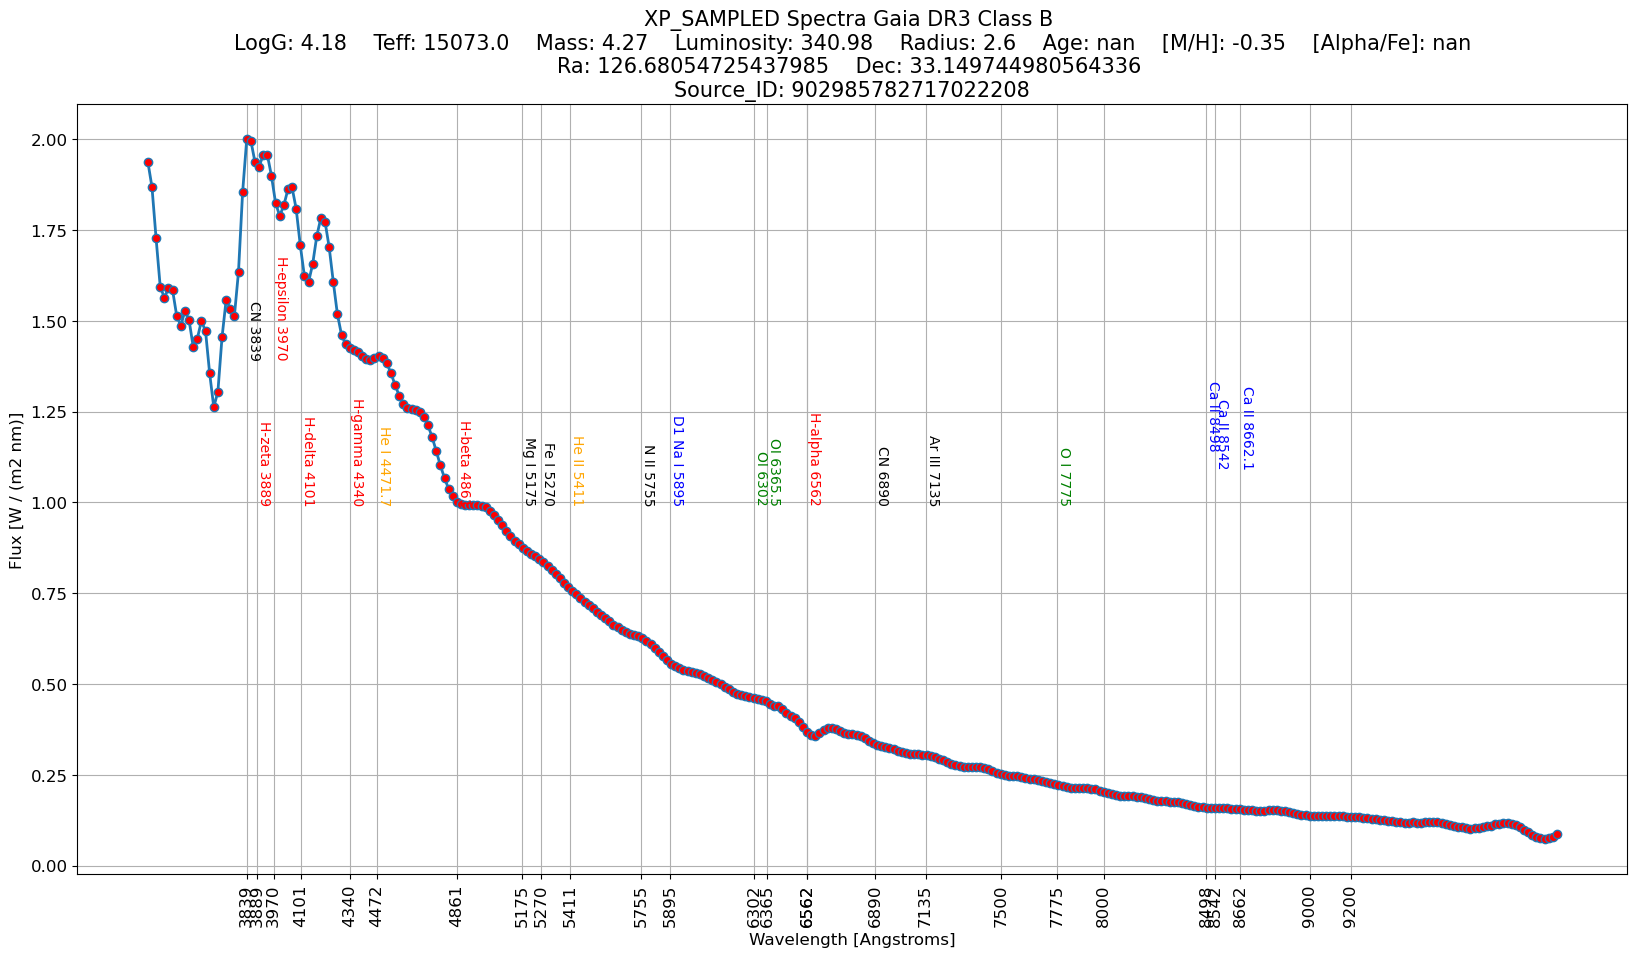


902985782717022208 has_rvs: False


Done!


In [54]:
for idx in range(0, len(results)):
    print("\n1: " + str(results[idx]) + ' has_xp_sampled: ' + str(target['has_xp_sampled'].iloc[idx]))                        # 1st print statement
    if target['has_xp_sampled'].iloc[idx] == True:
        datalink = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'XP_SAMPLED')
        outputs = [datalink[key][0] for key in datalink.keys()]

        #print("2: " + str(results[idx]) + " Number of stars with XP Spectra: " + str(len(outputs)))                         # 2nd print statement
        if outputs is not None:
            #print("3: " + "outputs is not None")                                                                            # 3rd print statement
            if len(outputs) > 0:
                #print("4: " + "len(outputs): " + str(len(outputs)))                                                         # 4th print statement

                # ====================================================================================
                xRa = str(target['ra'].iloc[idx])
                yDec = str(target['dec'].iloc[idx])
                source_id = str(target['source_id'].iloc[idx])

                print("\n" + "Ra: " + str(xRa))                                                                            
                print("Dec: " + str(yDec))  
                print("\n" + "Source_Id: " + str(source_id) + "\n")              

                if lamost_LRS_portal_flag == 'Y':
                    lamost_portal = 'https://dr7.lamost.org/spectrum/view?obsid=' + str(lamost_LRS_obsid)
                    webbrowser.open(lamost_portal)     

                if lamost_MRS_portal_flag == 'Y':
                    lamost_MRS_portal = 'https://dr7.lamost.org/v2.0/medspectrum/view?obsid=' + str(lamost_MRS_obsid)
                    webbrowser.open(lamost_MRS_portal)

                if cds_portal_flag == 'Y':
                    cds_portal = 'http://cdsportal.u-strasbg.fr/?target=' + str(xRa) + '%20' + str(yDec)
                    webbrowser.open(cds_portal) 

                if simbad_portal_flag == 'Y':
                    simbad_portal = 'http://simbad.cds.unistra.fr/simbad/sim-coo?Coord=' + str(xRa) + '+' + str(yDec) + \
                                '&CooFrame=FK5&CooEpoch=2000&CooEqui=2000&CooDefinedFrames=none&Radius=2&Radius.unit=arcmin&submit=submit+query'
                    webbrowser.open(simbad_portal)  

                if sdss_portal_flag == 'Y':
                    sdss_portal = 'http://skyserver.sdss.org/dr17/VisualTools/quickobj?ra=' + str(xRa) + '&dec=' + str(yDec)
                    webbrowser.open(sdss_portal)           

                if vizier_portal_flag == 'Y':
                    vizier_portal = 'http://vizier.u-strasbg.fr/viz-bin/VizieR-S?Gaia%20EDR3%20' + str(source_id) 
                    webbrowser.open(vizier_portal)                                          

                result_table = Simbad.query_region(coord.SkyCoord(str(xRa) + " " + str(yDec), 
                    unit=(u.deg, u.deg),frame='icrs'))

                #print("5: " + str(result_table))                                                                            # 5th print statement
                if result_table is not None:
                    if len(result_table) > 0:
                        #print("6: " + "Ra: " + str(xRa))                                                                     # 6th print statement
                        #print("7: " + "Dec: " + str(yDec))                                                                   # 7th print statement

                        for i in range(0, len(result_table['MAIN_ID'])):
                            if i < 5:
                                print(result_table['MAIN_ID'][i])

                        target1 = result_table['MAIN_ID'][0]

                        object = Simbad.query_object(target1)

                        tap_service = vo.dal.TAPService("http://simbad.u-strasbg.fr/simbad/sim-tap")

                        tap_sql = "SELECT main_id, sp_type, otype_txt, otype_longname \
                                        FROM basic JOIN ident ON oidref = oid \
                                            JOIN otypedef ON basic.otype = otypedef.otype \
                                        WHERE id = '" + str(target1) + "';"

                        tap_results = tap_service.search(tap_sql)
                        sptype = tap_results['sp_type']
                        txt = str(sptype).split("=")
                        txt = str(txt).replace("['", "")
                        sp_txt = str(txt).replace("']", "")
                        print("\n" + "Simbad star subclass: " + str(sp_txt))


                print("\n" + "BP_RP star subclass: " + str(target['SpT2'].iloc[idx]))
                print("BP_RP dereddened star subclass: " + str(target['SpT2_dereddened'].iloc[idx]))
                print("classlabel_espels: " + str(target['classlabel_espels'].iloc[idx]))
                print("Star Type: " + str(target['Star_Type'].iloc[idx]))
                print("SpTypeSim: " +  str(SpTypeSim))
                print("SpTypeSD: " +  str(SpTypeSD))
                print("SpName: " +  str(SpName))
                if lamost_LRS_portal_flag == 'Y':
                    print("\nlamost_LRS_designation: "  + str(lamost_LRS_designation))
                    print("lamost_LRS_obsid: "  + str(lamost_LRS_obsid))
                    print("lamost_LRS_gaia_source_id: "  + str(lamost_LRS_source_id))
                    print("lamost_LRS_subclass: " + str(lamost_LRS_subclass) + '\n' )
                if lamost_MRS_portal_flag == 'Y':
                    print("lamost_MRS_designation: "  + str(lamost_MRS_designation))
                    print("lamost_MRS_obsid: "  + str(lamost_MRS_obsid))
                    print("lamost_MRS_gaia_source_id: "  + str(lamost_MRS_source_id))
                    print("lamost_MRS_mobsid: " + str(lamost_MRS_mobsid) + '\n' )
                #print('\nasassn_name: ' + str(df_variable[['asassn_name']].values))
                #print('other_names: ' + str(df_variable[['other_names']].values))
                #print("\nASAS_SN Variable Type: " + str(ASASSN_Variable_Type) + '\n' )
                #print("Star Distance [pc]: " + str(int(target['distance_gspphot'].iloc[idx])))
                #print("Star Distance [light years]: " + str(int(target['distance_gspphot'].iloc[idx] * 3.26156)) + "\n")

                # ====================================================================================


                xp      = outputs[0].to_table()                       

                # Add flux-density columns ============================
                xp['flux_jy']         = xp['flux'].to(u.Jansky, equivalencies = u.spectral_density(xp['wavelength'].value * xp['wavelength'].unit))
                xp['flux_mjy']        = xp['flux_jy'].to(u.millijansky)
                xp['flux_mjy'].format = '7.4f'
                
                # =========
                
                #display(xp)

                # =========

                fig       = plt.figure(figsize=[20,10])

                yRangeMax = float(xp['flux'].max())

                plt.plot(xp['wavelength']*10, xp['flux']/yRangeMax * 2, linewidth = 2, marker='o', markerfacecolor='red') 
                plt.title('XP_SAMPLED Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                ' \nLogG: ' + str(round(target['logg_gspphot'].iloc[idx], 2)) + 
                '    Teff: ' + str(round(target['teff_gspphot'].iloc[idx],0)) +
                '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                '    [M/H]: ' + str(round(target['mh_gspphot'].iloc[idx],2)) +
                '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                if make_canvas_flag == "Y":
                    make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", 
                                fontsize = 12)
                #else:
                    #make_labels()

                if hydrogen_lines_flag == "Y":
                    Hydrogen_lines(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", 
                                   fontsize = 12)

                plt.show()
                
                    
        print("\n" + str(results[idx]) + ' has_rvs: ' + str(target['has_rvs'].iloc[idx]) + "\n")
        if target['has_rvs'].iloc[idx] == True:
            datalinkRVS = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'RVS')
            outputsRVS = [datalinkRVS[key][0] for key in datalinkRVS.keys()]
            #print("datalinkRVS: " + str(datalinkRVS))

            if outputsRVS is not None:
                if len(outputsRVS) >0:
                    xpRVS      = outputsRVS[0].to_table()

                    # =========
                
                    #display(xpRVS)

                    # =========

                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas()
                        
                    plt.show()


                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    plt.xlim(8460, 8580)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas1()
                        
                    plt.show()


                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    plt.xlim(8580, 8700)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas2()
                        
                    plt.show()


        #print(str(results[idx]) + ' has_xp_continuous: ' + str(target['has_xp_continuouss'].iloc[idx]))
        if target['has_xp_continuous'].iloc[idx] == True:
            datalinkXPC = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'XP_CONTINUOUS')
            outputsXPC = [datalinkXPC[key][0] for key in datalinkXPC.keys()]
            #print("datalinkXPC: " + str(datalinkXPC))

           

print("\nDone!")